## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [0]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = (x / 255.).astype('float32')
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.regularizers import l1,l1_l2

def build_mlp(input_shape,regu,l_ratio,output_units=10,n_neurons=[512,256,128]):
    
    input_layer=keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(n_neurons):
        if i==0:
            x=keras.layers.Dense(units=n_units, 
                                 activation='relu', 
                                 name='hidden_layer'+str(i+1),
                                 kernel_regularizer=regu(l_ratio))(input_layer)
        else:
            x=keras.layers.Dense(units=n_units, 
                                 activation='relu', 
                                 name='hidden_layer'+str(i+1),
                                 kernel_regularizer=regu(l_ratio))(x)
    
    out=keras.layers.Dense(units=output_units, activation='softmax', name='output_layer')(x)
    
    model=keras.models.Model(inputs=[input_layer],outputs=[out])
    
    return model

In [0]:
"""Code Here
設定超參數
"""
LEARNING_RATE=1e-4
BATCH_SIZE=64
EPOCHS=50
L_RATIO=[1e-2,1e-4,1e-8,1e-12]
MOMENTUM=0.95

In [0]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
REGULIZER=[l1,l1_l2]

for regu in REGULIZER:
    for l_ratio in L_RATIO:
        print('Experiment with regu=%s' % str(regu))
        print('Experiment with l_ratio=%.6f' % (l_ratio))
        keras.backend.clear_session()
        opt=keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM,nesterov=True)
        model=build_mlp(input_shape=x_train.shape[1:],regu=regu,l_ratio=l_ratio)
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(x_test, y_test),shuffle=True)
        
        exp_name='exp-regu-%s-l_ratio-%s' %(str(regu),str(l_ratio))
        
        results[exp_name]=model.history.history
        
        

Experiment with regu=<function l1 at 0x7f2ef1d797b8>
Experiment with l_ratio=0.010000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 22s 445us/step - loss: 288.0508 - accuracy: 0.2254 - val_loss: 183.8139 - val_accuracy: 0.2521
Epoch 2/50
50000/50000 [==============================] - 23s 451us/step - loss: 112.6533 - accuracy: 0.2567 - val_loss: 57.6779 - val_accuracy: 0.2560
Epoch 3/50
50000/50000 [==============================] - 23s 456us/step - loss: 34.8032 - accuracy: 0.1888 - val_loss: 23.4449 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 23s 456us/step - loss: 17.7107 - accuracy: 0.1000 - val_loss: 12.6622 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 23s 456us/step - loss: 9.0517 - accuracy: 0.1000 - val_loss: 6.1341 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 23s 461us/step - loss: 4.6130 - accuracy: 0.0983 -

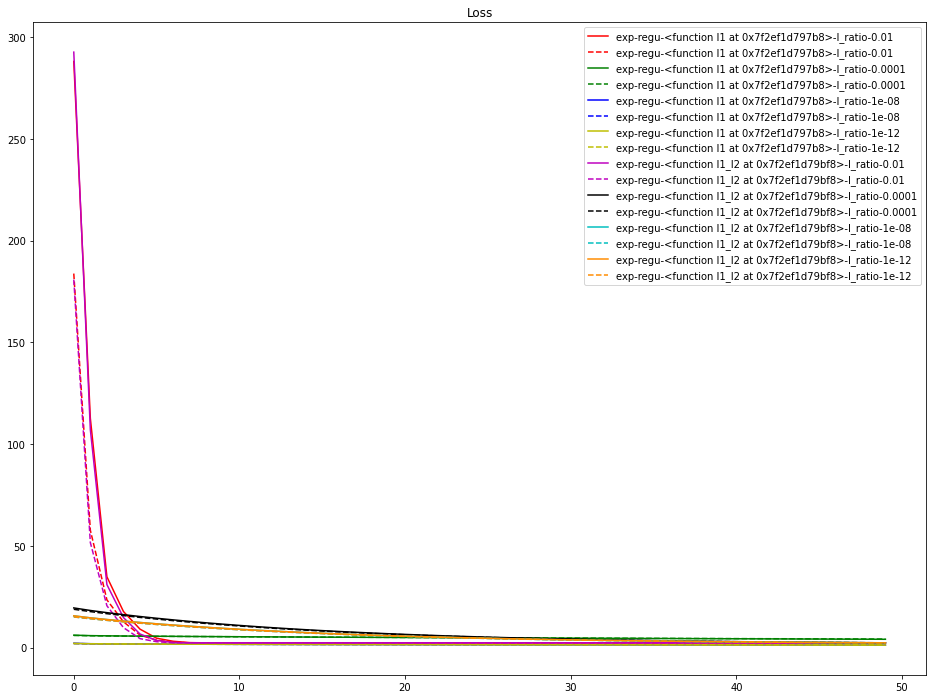

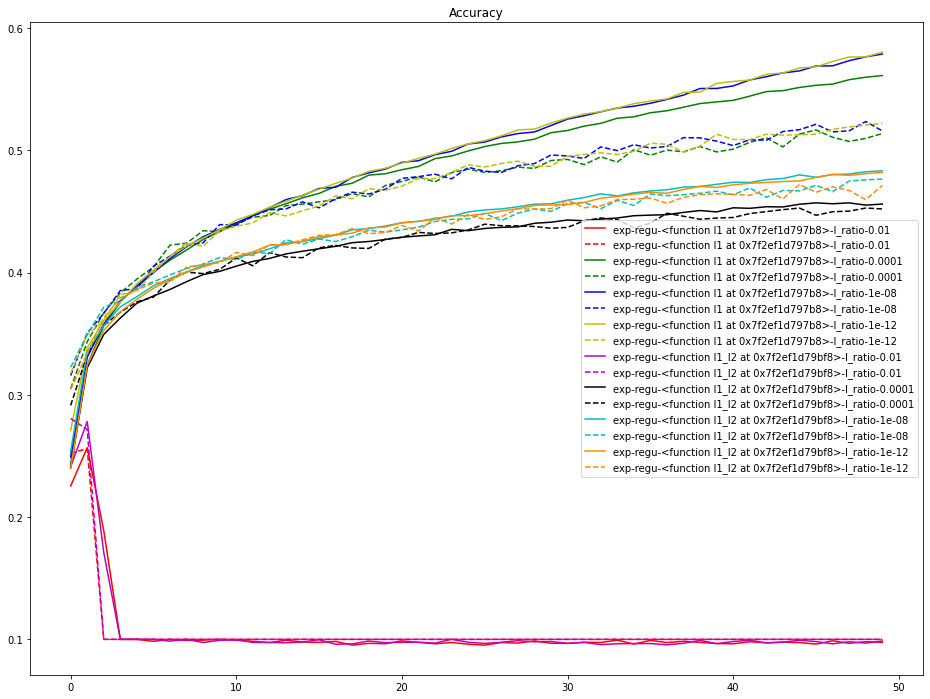

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k", "c", "darkorange"]

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['loss'])),results[con]['loss'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_loss'])),results[con]['val_loss'], '--', label=con, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['accuracy'])),results[con]['accuracy'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_accuracy'])),results[con]['val_accuracy'], '--', label=con, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()